<a href="https://colab.research.google.com/github/thecronus/MFI/blob/main/MFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#Esse programa usa The Money Flow Index (MFI) para dar sinais de compra e venda 

In [41]:
#Importando as bibliotecas
import warnings 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [42]:
#Carregando a base de dados 
#from google.colab import files
#uploaded = files.upload()

In [43]:
#Atribuindo 
df = pd.read_csv('/content/PETR4.SA.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-08-26,2020-08-26,22.780001,22.900000,22.040001,22.219999,20.288157,69925300.0
2020-08-27,2020-08-27,22.320000,22.469999,22.040001,22.150000,20.224243,35489800.0
2020-08-28,2020-08-28,22.250000,22.540001,22.059999,22.540001,20.580338,31071000.0
2020-08-31,2020-08-31,22.320000,22.430000,21.889999,21.889999,19.986849,48539700.0
2020-09-01,2020-09-01,22.200001,22.889999,22.120001,22.870001,20.881645,66299700.0
...,...,...,...,...,...,...,...
2021-08-19,2021-08-19,26.260000,26.870001,26.129999,26.639999,26.639999,80808200.0
2021-08-20,2021-08-20,26.400000,26.629999,26.170000,26.600000,26.600000,84938300.0
2021-08-23,2021-08-23,26.940001,27.309999,26.770000,27.020000,27.020000,70161500.0
2021-08-24,2021-08-24,27.290001,27.629999,27.240000,27.580000,27.580000,49831400.0


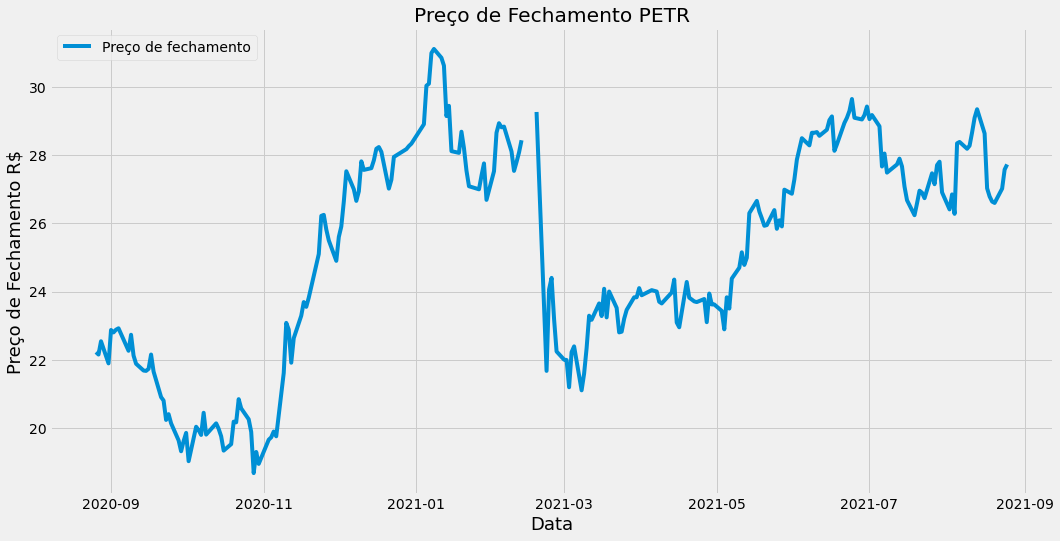

In [44]:
#Vizualizando o gráfico
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label = 'Preço de fechamento')
plt.title('Preço de Fechamento PETR')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Preço de Fechamento R$',fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [45]:
#Calculando o preço tipico
typical_price= (df['Close'] + df['High'] + df['Low'])/3
typical_price

2020-08-26    22.386667
2020-08-27    22.220000
2020-08-28    22.380000
2020-08-31    22.069999
2020-09-01    22.626667
                ...    
2021-08-19    26.546666
2021-08-20    26.466666
2021-08-23    27.033333
2021-08-24    27.483333
2021-08-25     9.243333
Length: 246, dtype: float64

In [46]:
#Pegar o periodo
period = 14

In [47]:
#calcular the money flow
money_flow = typical_price * df['Volume']


In [48]:
#Pegando todos os money flows negativos e positivos 
positive_flow = []
negative_flow = []

#Loop entre o preço tipico 
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]:
    positive_flow.append(money_flow[i-1])
    negative_flow.append(0)
  elif typical_price[i] < typical_price[i-1]:
    negative_flow.append(money_flow[i-1])
    positive_flow.append(0)
  else:
    negative_flow.append(0)
    positive_flow.append(0)

In [49]:
#Pegando todos os positivos e negativos money flows
positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flow)):
  positive_mf.append( sum(positive_flow[i+1- period : i+1]))

for i in range(period-1, len(negative_flow)):
  negative_mf.append( sum(negative_flow[i+1- period : i+1]))

In [50]:
#Calculando the money flow index
mfi = 100*(np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf)))


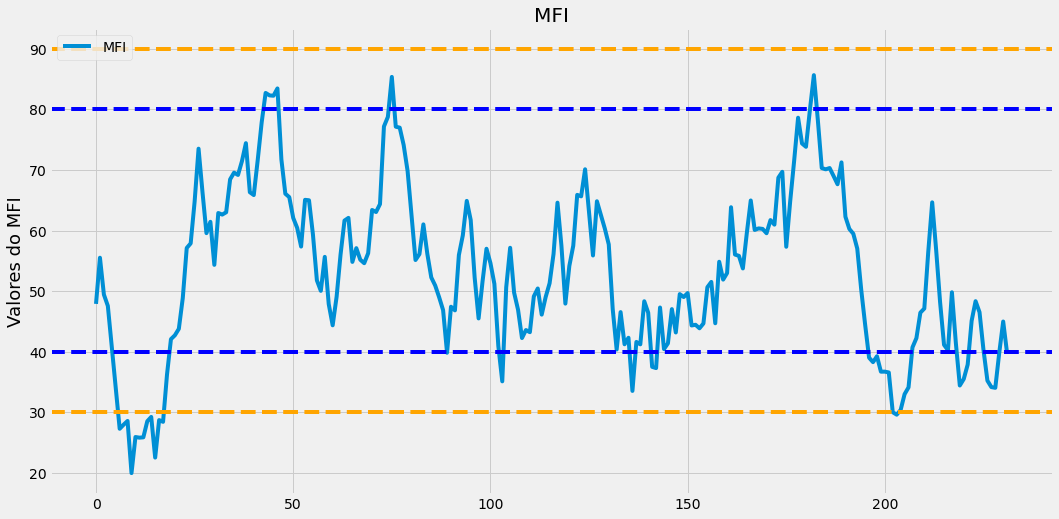

In [51]:
#Vizualindo o MFI 
df2 = pd.DataFrame()
df2['MFI'] = mfi

plt.figure(figsize=(16,8))
plt.plot(df2['MFI'], label = 'MFI')
plt.axhline(30, linestyle = '--', color = 'orange')
plt.axhline(40, linestyle = '--', color = 'blue')
plt.axhline(80, linestyle = '--', color = 'blue')
plt.axhline(90, linestyle = '--', color = 'orange')
plt.title('MFI')
plt.ylabel('Valores do MFI',fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [52]:
#Criando um novo DF
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi

In [53]:
#Criando uma função com sinais de compra e venda
def get_signal(data, high, low):
  buy_signal = []
  sell_signal = []

  for i in range(len(data['MFI'])):
    if data['MFI'][i] > high:
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['MFI'][i] < low:
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)
  return (buy_signal, sell_signal)



In [54]:
#Adicioando as novas colunas (compra e venda)
new_df['Buy'] = get_signal(new_df, 75,35)[0]
new_df['Sell'] = get_signal(new_df, 75,35)[1]


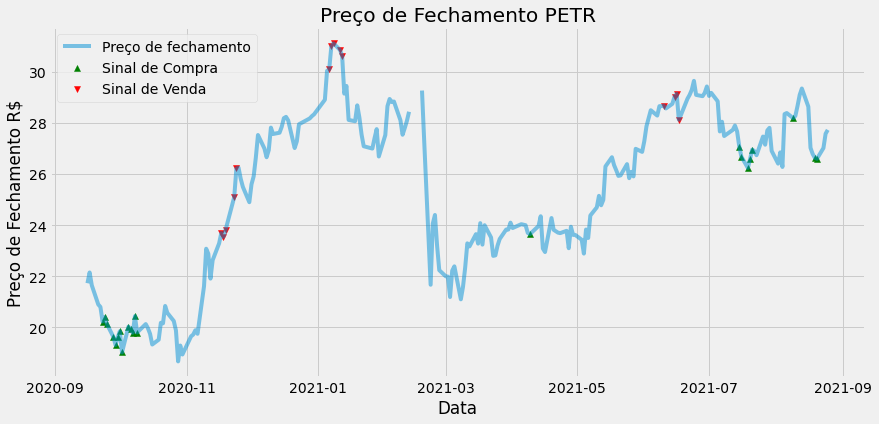

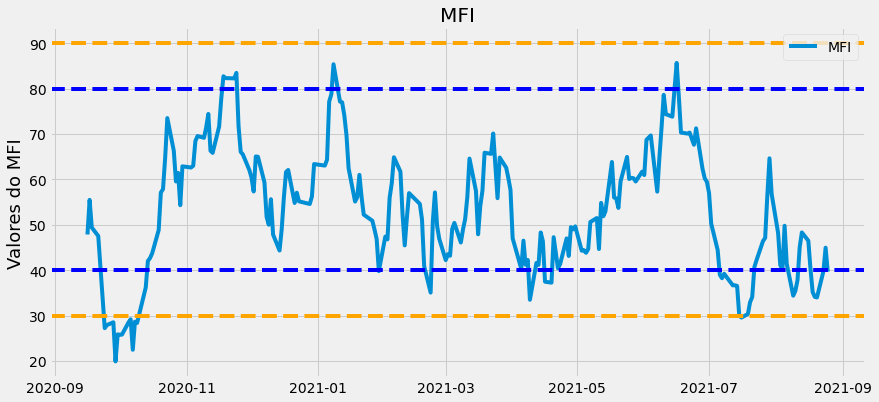

In [55]:
#Plotando o gráfico 
plt.figure(figsize=(13,6))
plt.plot(new_df['Close'], label = 'Preço de fechamento', alpha  = 0.5)
plt.scatter(new_df.index, new_df['Buy'], color = 'green', label = 'Sinal de Compra', marker = '^', alpha =1 )
plt.scatter(new_df.index, new_df['Sell'], color = 'red', label = 'Sinal de Venda', marker = 'v', alpha =1 )
plt.title('Preço de Fechamento PETR')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento R$')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(13,6))
plt.plot(new_df['MFI'], label = 'MFI')
plt.axhline(30, linestyle = '--', color = 'orange')
plt.axhline(40, linestyle = '--', color = 'blue')
plt.axhline(80, linestyle = '--', color = 'blue')
plt.axhline(90, linestyle = '--', color = 'orange')
plt.title('MFI')
plt.ylabel('Valores do MFI',fontsize=18)
plt.legend(loc='upper right')
plt.show()
